In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

/tmp/ipykernel_35963/2782115097.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
os.chdir("/home/rkarimi/vesicle-picker/evaluation")

In [2]:
# Figure SX--search over SigmaC
# Repeat the steps above for the parameter 'd' for bilateral filtering
s10 = pd.read_csv("sigmac_search/sigmac_10_2024-09-02_16-50.csv")
s10['s']=10
s30 = pd.read_csv("sigmac_search/sigmac_30_2024-09-02_16-56.csv")
s30['s']=30
s50 = pd.read_csv("sigmac_search/sigmac_50_2024-09-02_17-02.csv")
s50['s']=50
s70 = pd.read_csv("sigmac_search/sigmac_70_2024-09-02_17-08.csv")
s70['s']=70
s90 = pd.read_csv("sigmac_search/sigmac_90_2024-09-02_17-13.csv")
s90['s']=90
s110 = pd.read_csv("sigmac_search/sigmac_110_2024-09-02_17-28.csv")
s110['s']=110
s130 = pd.read_csv("sigmac_search/sigmac_130_2024-09-02_17-34.csv")
s130['s']=130


# Concatenate
s_master = pd.concat([s10, s30, s50, s70, s90, s110, s130])

# Use pivots/melts to make a plot
s_melt = s_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 's'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

s_melt

,model,iou,stability,uid,s,metric,value
0,vit_h,0.9,0.9,10052325399042271146,10,recall,0.465116
1,vit_h,0.9,0.9,1012761875947852486,10,recall,0.829268
2,vit_h,0.9,0.9,10164603400945916340,10,recall,0.700000
3,vit_h,0.9,0.9,1018451679478154278,10,recall,0.395833
4,vit_h,0.9,0.9,10214903082497276419,10,recall,0.511111
...,...,...,...,...,...,...,...
695,vit_h,0.9,0.9,13266244974299098930,130,precision,0.494118
696,vit_h,0.9,0.9,13482212850578731754,130,precision,0.452055
697,vit_h,0.9,0.9,13515062055012148070,130,precision,0.438356
698,vit_h,0.9,0.9,13531435791539149697,130,precision,0.597015


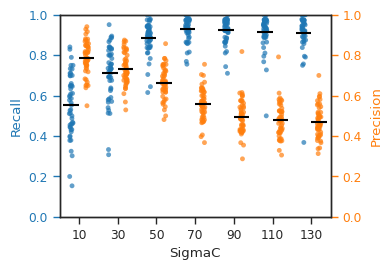

In [3]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


# Create a striplot of blur strength vs precision and recall
ax = sns.stripplot(data=s_melt, x='s', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7, size=3.5)
sns.boxplot(data=s_melt, x='s', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("SigmaC")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('sigmac_search/sigmac_plot.pdf', bbox_inches='tight')

plt.show()

In [3]:
# Figure 1a--zero-shot model comparison, split violin plot.
# Read in the three models
vit_b = pd.read_csv("fig1/model/model_type_vitb_2024-03-25_11-20.csv")
vit_l = pd.read_csv("fig1/model/model_type_vitl_2024-03-25_11-40.csv")
vit_h = pd.read_csv("fig1/model/model_type_vith_2024-03-25_12-00.csv")

# Stack into one dataset
model_master = pd.concat([vit_b, vit_l, vit_h])
model_master

,Unnamed: 0,recall,precision,model,lowpass,downsample,iou,stability,uid
0,0,0.279070,0.857143,vit_b,NaN,1,0.9,0.9,10052325399042271146
1,1,0.439024,0.692308,vit_b,NaN,1,0.9,0.9,1012761875947852486
2,2,0.275000,0.846154,vit_b,NaN,1,0.9,0.9,10164603400945916340
3,3,0.166667,0.727273,vit_b,NaN,1,0.9,0.9,1018451679478154278
4,4,0.288889,0.684211,vit_b,NaN,1,0.9,0.9,10214903082497276419
...,...,...,...,...,...,...,...,...,...
45,45,0.755556,0.871795,vit_h,NaN,1,0.9,0.9,13266244974299098930
46,46,0.363636,0.800000,vit_h,NaN,1,0.9,0.9,13482212850578731754
47,47,0.513514,0.863636,vit_h,NaN,1,0.9,0.9,13515062055012148070
48,48,0.707317,0.878788,vit_h,NaN,1,0.9,0.9,13531435791539149697


In [4]:
# Use pivots/melts to make a plot
model_melt = model_master.melt(id_vars=['model', 'iou', 'stability', 'uid'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

model_melt

,model,iou,stability,uid,metric,value
0,vit_b,0.9,0.9,10052325399042271146,recall,0.279070
1,vit_b,0.9,0.9,1012761875947852486,recall,0.439024
2,vit_b,0.9,0.9,10164603400945916340,recall,0.275000
3,vit_b,0.9,0.9,1018451679478154278,recall,0.166667
4,vit_b,0.9,0.9,10214903082497276419,recall,0.288889
...,...,...,...,...,...,...
295,vit_h,0.9,0.9,13266244974299098930,precision,0.871795
296,vit_h,0.9,0.9,13482212850578731754,precision,0.800000
297,vit_h,0.9,0.9,13515062055012148070,precision,0.863636
298,vit_h,0.9,0.9,13531435791539149697,precision,0.878788


In [5]:
# # Create a violin plot
# sns.violinplot(data=model_melt, x='model', y='value', hue='metric', split=True, inner="quart")
# plt.legend(loc='lower center')
# plt.xlabel("SA Model Architecture")
# plt.ylabel("Precision / Recall")

In [6]:
# # Create a boxplot
# sns.boxplot(data=model_melt, x='model', y='value', hue='metric')
# plt.legend(loc='lower center')
# plt.xlabel("SA Model Architecture")
# plt.ylabel("Precision / Recall")

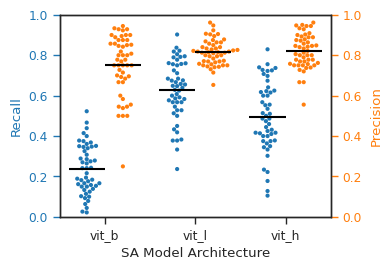

In [143]:
# Create a swarmplot with lines denoting the means
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


sns.swarmplot(data=model_melt, x='model', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], ax=ax, size=3)
sns.boxplot(data=model_melt, x='model', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("SA Model Architecture")
ax.set_ylabel("Recall", color='#1f77b4')
ax.set_ylim(0, 1)

# Turn on the bottom axis ticks
ax.xaxis.tick_bottom()

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/model_type.pdf', bbox_inches='tight')

plt.show()


In [11]:
# Figure 1b.1 -- runtime as a function of downsampling

# Import the datasets
down1 = pd.read_csv("fig1/downsample/vit_h/downsample_1_2024-03-25_13-24.csv")
down2 = pd.read_csv("fig1/downsample/vit_h/downsample_2_2024-03-25_13-31.csv")
down4 = pd.read_csv("fig1/downsample/vit_h/downsample_4_2024-03-25_13-37.csv")
down8 = pd.read_csv("fig1/downsample/vit_h/downsample_8_2024-03-25_13-42.csv")
down16 = pd.read_csv("fig1/downsample/vit_h/downsample_16_2024-03-25_13-47.csv")

downsample_master = pd.concat([down1, down2, down4, down8, down16])
downsample_master
downsample_melt = downsample_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'downsample', 'runtime'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

downsample_melt

,model,iou,stability,uid,downsample,runtime,metric,value
0,vit_h,0.9,0.9,10052325399042271146,1,19.782418,recall,0.534884
1,vit_h,0.9,0.9,1012761875947852486,1,24.389262,recall,0.829268
2,vit_h,0.9,0.9,10164603400945916340,1,15.949979,recall,0.425000
3,vit_h,0.9,0.9,1018451679478154278,1,16.142432,recall,0.375000
4,vit_h,0.9,0.9,10214903082497276419,1,21.402759,recall,0.600000
...,...,...,...,...,...,...,...,...
495,vit_h,0.9,0.9,13266244974299098930,16,4.961032,precision,0.761905
496,vit_h,0.9,0.9,13482212850578731754,16,5.019464,precision,0.650000
497,vit_h,0.9,0.9,13515062055012148070,16,5.017871,precision,0.483871
498,vit_h,0.9,0.9,13531435791539149697,16,4.983964,precision,0.756098


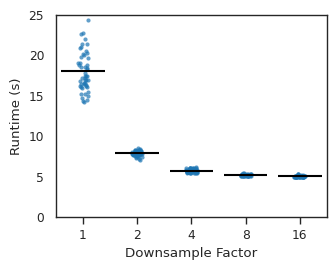

In [10]:
# Show the runtimes as a barplot
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()

sns.stripplot(data=downsample_master, x='downsample', y='runtime', dodge=True, ax=ax, size=3.5, alpha=0.7)
sns.boxplot(data=downsample_master, x='downsample', y='runtime', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Downsample Factor")
ax.set_ylabel("Runtime (s)")
ax.set_ylim(0, 25)

# Turn on the bottom axis ticks
ax.xaxis.tick_bottom()

# Set the figure size with a width of 3.5 inches and a height calculated for 4:3 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/downsample_runtime_stripplot.pdf', bbox_inches='tight')

plt.show()



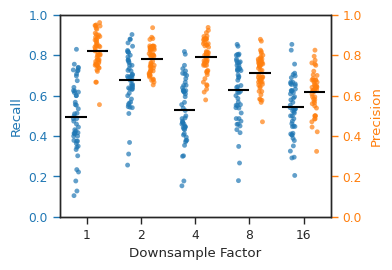

In [12]:
# Make a combined precision/recall stripplot
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


sns.stripplot(data=downsample_melt, x='downsample', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], ax=ax, size=3.5, alpha=0.7)
sns.boxplot(data=downsample_melt, x='downsample', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Downsample Factor")
ax.set_ylabel("Recall", color='#1f77b4')
ax.set_ylim(0, 1)

# Turn on the bottom axis ticks
ax.xaxis.tick_bottom()

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/downsample_precision_recall_stripplot.pdf', bbox_inches='tight')

plt.show()

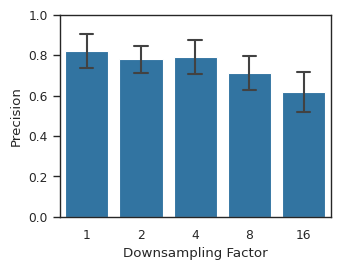

In [139]:
# Show the runtimes as a barplot
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()

sns.barplot(data=downsample_master, x='downsample', y='precision', errorbar='sd', ax=ax, alpha=1, err_kws={'linewidth': 1.5}, capsize=0.25)
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.xlabel("Downsampling Factor")
ax.yaxis.tick_left()

# Set the figure size with a width of 3.5 inches and a height calculated for 4:3 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/downsample_precision.pdf', bbox_inches='tight')

plt.show()


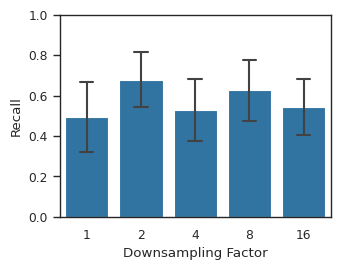

In [140]:
# Show the runtimes as a barplot
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()

sns.barplot(data=downsample_master, x='downsample', y='recall', errorbar='sd', ax=ax, alpha=1, err_kws={'linewidth': 1.5}, capsize=0.25)
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.xlabel("Downsampling Factor")
ax.yaxis.tick_left()

# Set the figure size with a width of 3.5 inches and a height calculated for 4:3 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/downsample_recall.pdf', bbox_inches='tight')

plt.show()


In [21]:
# Figure 1b.2 Show recall and precision as a function of downsample

downsample_recall = pd.DataFrame({
    'downsample_factor': [str(downsample) for downsample in [1, 2, 4, 8, 16]],
    'mean_recall': downsample_master.groupby('downsample')['recall'].mean(),
    'sd_recall': downsample_master.groupby('downsample')['recall'].std()
})

downsample_precision = pd.DataFrame({
    'downsample_factor': [str(downsample) for downsample in [1, 2, 4, 8, 16]],
    'mean_precision': downsample_master.groupby('downsample')['precision'].mean(),
    'sd_precision': downsample_master.groupby('downsample')['precision'].std()
})

downsample_scatter = pd.merge(downsample_recall, downsample_precision)
downsample_scatter

,downsample_factor,mean_recall,sd_recall,mean_precision,sd_precision
0,1,0.494501,0.171948,0.819658,0.084906
1,2,0.678213,0.136669,0.779995,0.067667
2,4,0.528841,0.151063,0.790915,0.085013
3,8,0.625556,0.151567,0.711843,0.082809
4,16,0.542813,0.138485,0.618240,0.099704


<Axes: xlabel='mean_recall', ylabel='mean_precision'>

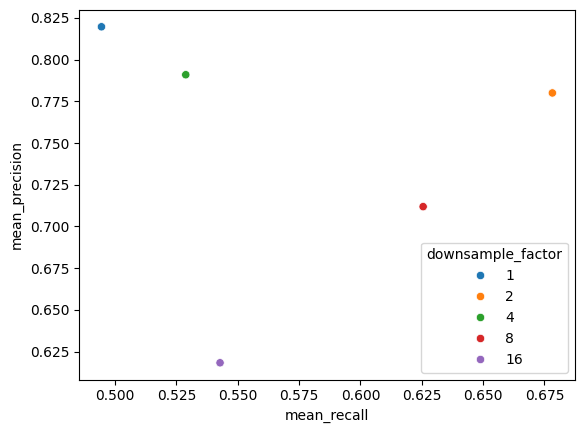

In [22]:
sns.scatterplot(data=downsample_scatter, x='mean_recall', y='mean_precision', hue='downsample_factor')

In [11]:
# Compare the ability of vith and vitl to handle downsampling

# Import the datasets
down1 = pd.read_csv("fig1/downsample/vit_l/downsample_1_2024-03-25_12-28.csv")
down2 = pd.read_csv("fig1/downsample/vit_l/downsample_2_2024-03-25_12-34.csv")
down4 = pd.read_csv("fig1/downsample/vit_l/downsample_4_2024-03-25_12-50.csv")
down8 = pd.read_csv("fig1/downsample/vit_l/downsample_8_2024-03-25_12-54.csv")
down16 = pd.read_csv("fig1/downsample/vit_l/downsample_16_2024-03-25_12-59.csv")

downsample_master_vitl = pd.concat([down1, down2, down4, down8, down16])
downsample_master_vitl

,Unnamed: 0,recall,precision,model,lowpass,downsample,iou,stability,runtime,uid
0,0,0.674419,0.783784,vit_l,NaN,1,0.9,0.9,21.674792,10052325399042271146
1,1,0.902439,0.755102,vit_l,NaN,1,0.9,0.9,24.874844,1012761875947852486
2,2,0.600000,0.923077,vit_l,NaN,1,0.9,0.9,17.280420,10164603400945916340
3,3,0.583333,0.903226,vit_l,NaN,1,0.9,0.9,17.599328,1018451679478154278
4,4,0.711111,0.653061,vit_l,NaN,1,0.9,0.9,22.934085,10214903082497276419
...,...,...,...,...,...,...,...,...,...,...
45,45,0.666667,0.769231,vit_l,NaN,16,0.9,0.9,4.273644,13266244974299098930
46,46,0.204545,0.818182,vit_l,NaN,16,0.9,0.9,4.218650,13482212850578731754
47,47,0.324324,0.521739,vit_l,NaN,16,0.9,0.9,4.250813,13515062055012148070
48,48,0.658537,0.843750,vit_l,NaN,16,0.9,0.9,4.272946,13531435791539149697


In [23]:
downsample_models = pd.concat([downsample_master, downsample_master_vitl])

downsample_recall_vitl = pd.DataFrame({
    'downsample_factor': [str(downsample) for downsample in [1, 2, 4, 8, 16]],
    'mean_recall': downsample_master_vitl.groupby('downsample')['recall'].mean(),
    'sd_recall': downsample_master_vitl.groupby('downsample')['recall'].std()
})

downsample_precision_vitl = pd.DataFrame({
    'downsample_factor': [str(downsample) for downsample in [1, 2, 4, 8, 16]],
    'mean_precision': downsample_master_vitl.groupby('downsample')['precision'].mean(),
    'sd_precision': downsample_master_vitl.groupby('downsample')['precision'].std()
})

downsample_scatter_vitl = pd.merge(downsample_recall_vitl, downsample_precision_vitl)
downsample_scatter['model']='vit_h'
downsample_scatter_vitl['model']='vit_l'
downsample_model_scatter = pd.concat([downsample_scatter, downsample_scatter_vitl])
downsample_model_scatter

,downsample_factor,mean_recall,sd_recall,mean_precision,sd_precision,model
0,1,0.494501,0.171948,0.819658,0.084906,vit_h
1,2,0.678213,0.136669,0.779995,0.067667,vit_h
2,4,0.528841,0.151063,0.790915,0.085013,vit_h
3,8,0.625556,0.151567,0.711843,0.082809,vit_h
4,16,0.542813,0.138485,0.618240,0.099704,vit_h
0,1,0.626355,0.146807,0.815059,0.062783,vit_l
1,2,0.711452,0.110487,0.754127,0.073156,vit_l
2,4,0.555653,0.134520,0.782794,0.075448,vit_l
3,8,0.670783,0.130939,0.737706,0.081572,vit_l
4,16,0.422386,0.131301,0.651655,0.142763,vit_l


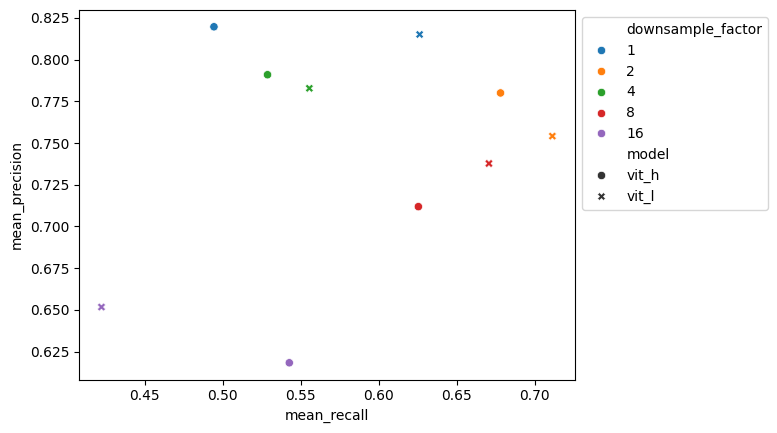

In [27]:
# Create a scatterplot for comparison
ax = sns.scatterplot(data=downsample_model_scatter, x='mean_recall', y='mean_precision', hue='downsample_factor', style='model')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [29]:
# Figure 1c.1 -- comparison of different blurring types
# Read in the blur types
gaussian = pd.read_csv("fig1/blur/gaussian_k19_2024-03-25_14-54.csv")
unblur = pd.read_csv("fig1/blur/downsample_4_2024-03-25_13-37.csv")
unblur['lowpass']="no_blur"
bilateral = pd.read_csv("fig1/blur/bilateral_s70_2024-03-25_16-24.csv")
bilateral['lowpass']="bilateral"

# Stack into one dataset
blur_master = pd.concat([unblur, gaussian, bilateral])
blur_master

,Unnamed: 0,recall,precision,model,lowpass,downsample,iou,stability,runtime,uid
0,0,0.441860,0.703704,vit_h,no_blur,4,0.9,0.9,5.586896,10052325399042271146
1,1,0.804878,0.750000,vit_h,no_blur,4,0.9,0.9,5.778269,1012761875947852486
2,2,0.625000,0.892857,vit_h,no_blur,4,0.9,0.9,5.578173,10164603400945916340
3,3,0.354167,0.894737,vit_h,no_blur,4,0.9,0.9,5.539813,1018451679478154278
4,4,0.466667,0.617647,vit_h,no_blur,4,0.9,0.9,5.695608,10214903082497276419
...,...,...,...,...,...,...,...,...,...,...
45,45,0.955556,0.544304,vit_h,bilateral,4,0.9,0.9,6.091276,13266244974299098930
46,46,0.863636,0.622951,vit_h,bilateral,4,0.9,0.9,5.924843,13482212850578731754
47,47,0.864865,0.571429,vit_h,bilateral,4,0.9,0.9,5.947640,13515062055012148070
48,48,0.975610,0.666667,vit_h,bilateral,4,0.9,0.9,6.099056,13531435791539149697


In [30]:
# Use pivots/melts to make a plot
blur_melt = blur_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'lowpass'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

blur_melt

,model,iou,stability,uid,lowpass,metric,value
0,vit_h,0.9,0.9,10052325399042271146,no_blur,recall,0.441860
1,vit_h,0.9,0.9,1012761875947852486,no_blur,recall,0.804878
2,vit_h,0.9,0.9,10164603400945916340,no_blur,recall,0.625000
3,vit_h,0.9,0.9,1018451679478154278,no_blur,recall,0.354167
4,vit_h,0.9,0.9,10214903082497276419,no_blur,recall,0.466667
...,...,...,...,...,...,...,...
295,vit_h,0.9,0.9,13266244974299098930,bilateral,precision,0.544304
296,vit_h,0.9,0.9,13482212850578731754,bilateral,precision,0.622951
297,vit_h,0.9,0.9,13515062055012148070,bilateral,precision,0.571429
298,vit_h,0.9,0.9,13531435791539149697,bilateral,precision,0.666667


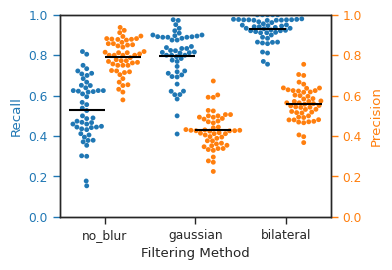

In [169]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()

# Create a swarmplot and capture the returned axes object
sns.swarmplot(data=blur_melt, x='lowpass', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=1, ax=ax, size=3.5)
sns.boxplot(data=blur_melt, x='lowpass', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Filtering Method")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/filtering_method.pdf', bbox_inches='tight')

plt.show()

In [33]:
# Figure 1c.2 -- comparison of blurring strength on gaussian filter
k3 = pd.read_csv("fig1/blur/gaussian_k3_2024-03-25_14-04.csv")
k3['kernel_size']=3
k5 = pd.read_csv("fig1/blur/gaussian_k5_2024-03-25_14-10.csv")
k5['kernel_size']=5
k7 = pd.read_csv("fig1/blur/gaussian_k7_2024-03-25_14-15.csv")
k7['kernel_size']=7
k9 = pd.read_csv("fig1/blur/gaussian_k9_2024-03-25_14-21.csv")
k9['kernel_size']=9
k11 = pd.read_csv("fig1/blur/gaussian_k11_2024-03-25_14-27.csv")
k11['kernel_size']=11
k13 = pd.read_csv("fig1/blur/gaussian_k13_2024-03-25_14-33.csv")
k13['kernel_size']=13
k15 = pd.read_csv("fig1/blur/gaussian_k15_2024-03-25_14-40.csv")
k15['kernel_size']=15
k17 = pd.read_csv("fig1/blur/gaussian_k17_2024-03-25_14-48.csv")
k17['kernel_size']=17
k19 = pd.read_csv("fig1/blur/gaussian_k19_2024-03-25_14-54.csv")
k19['kernel_size']=19
k21 = pd.read_csv("fig1/blur/gaussian_k21_2024-03-25_15-01.csv")
k21['kernel_size']=21

# Concatenate
blur_strength_master = pd.concat([k3, k5, k7, k9, k11, k13, k15, k17, k19, k21])

# Use pivots/melts to make a plot
blur_strength_melt = blur_strength_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'kernel_size'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

blur_strength_melt

,model,iou,stability,uid,kernel_size,metric,value
0,vit_h,0.9,0.9,10052325399042271146,3,recall,0.674419
1,vit_h,0.9,0.9,1012761875947852486,3,recall,0.829268
2,vit_h,0.9,0.9,10164603400945916340,3,recall,0.750000
3,vit_h,0.9,0.9,1018451679478154278,3,recall,0.395833
4,vit_h,0.9,0.9,10214903082497276419,3,recall,0.600000
...,...,...,...,...,...,...,...
995,vit_h,0.9,0.9,13266244974299098930,21,precision,0.453488
996,vit_h,0.9,0.9,13482212850578731754,21,precision,0.283784
997,vit_h,0.9,0.9,13515062055012148070,21,precision,0.300000
998,vit_h,0.9,0.9,13531435791539149697,21,precision,0.629032


In [34]:
blur_strength_recall = pd.DataFrame({
    'kernel': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'mean_recall': blur_strength_master.groupby('kernel_size')['recall'].mean(),
    'sd_recall': blur_strength_master.groupby('kernel_size')['recall'].std()
})

blur_strength_precision = pd.DataFrame({
    'kernel': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'mean_precision': blur_strength_master.groupby('kernel_size')['precision'].mean(),
    'sd_precision': blur_strength_master.groupby('kernel_size')['precision'].std()
})

blur_strength_scatter = pd.merge(blur_strength_recall, blur_strength_precision)
blur_strength_scatter

,kernel,mean_recall,sd_recall,mean_precision,sd_precision
0,3,0.623744,0.148509,0.697653,0.072502
1,5,0.660653,0.144997,0.674535,0.085660
2,7,0.702237,0.147288,0.648098,0.087377
3,9,0.768011,0.137616,0.625034,0.096184
4,11,0.813572,0.127055,0.596927,0.097808
5,13,0.824727,0.110273,0.549031,0.094259
6,15,0.830104,0.108302,0.507866,0.084081
7,17,0.818818,0.116638,0.468203,0.089978
8,19,0.793896,0.122627,0.427641,0.088545
9,21,0.769040,0.126477,0.389363,0.088298


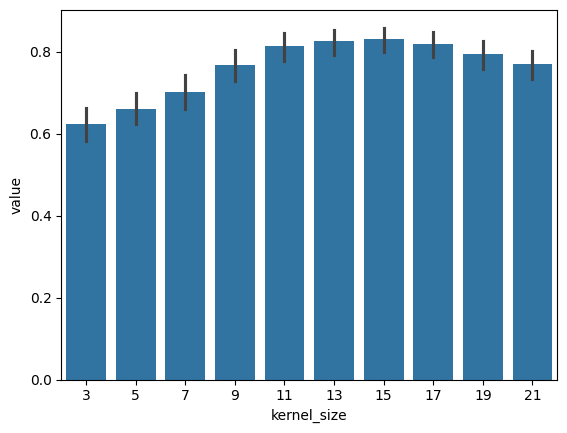

In [63]:
# Draw a recall barplot for Gaussian blurring
sns.barplot(data=blur_strength_melt.loc[blur_strength_melt['metric']=='recall'], y='value', x='kernel_size')

<Axes: xlabel='kernel_size', ylabel='value'>

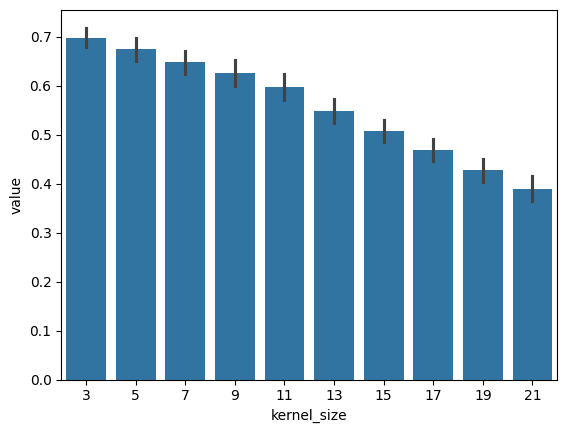

In [64]:
# Draw a precision barplot for blurring
sns.barplot(data=blur_strength_melt.loc[blur_strength_melt['metric']=='precision'], y='value', x='kernel_size')

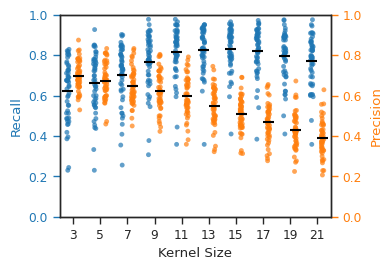

In [148]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


# Create a striplot of blur strength vs precision and recall
ax = sns.stripplot(data=blur_strength_melt, x='kernel_size', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7, size=3.5)
sns.boxplot(data=blur_strength_melt, x='kernel_size', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Kernel Size")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/gaussian_kernel.pdf', bbox_inches='tight')

plt.show()

In [68]:
# Repeat the steps above for the parameter 'd' for bilateral filtering
d05 = pd.read_csv("fig1/blur/bilateral_d05_2024-03-25_15-55.csv")
d05['d']=5
d10 = pd.read_csv("fig1/blur/bilateral_d10_2024-03-25_15-20.csv")
d10['d']=10
d15 = pd.read_csv("fig1/blur/bilateral_d15_2024-03-25_15-50.csv")
d15['d']=15
d20 = pd.read_csv("fig1/blur/bilateral_d20_2024-03-25_15-27.csv")
d20['d']=20
d25 = pd.read_csv("fig1/blur/bilateral_d25_2024-03-25_15-44.csv")
d25['d']=25
d30 = pd.read_csv("fig1/blur/bilateral_d30_2024-03-25_15-33.csv")
d30['d']=30
d35 = pd.read_csv("fig1/blur/bilateral_d35_2024-03-25_15-39.csv")
d35['d']=35

# Concatenate
d_master = pd.concat([d05, d10, d15, d20, d25, d30, d35])

# Use pivots/melts to make a plot
d_melt = d_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'd'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

d_melt

,model,iou,stability,uid,d,metric,value
0,vit_h,0.9,0.9,10052325399042271146,5,recall,0.627907
1,vit_h,0.9,0.9,1012761875947852486,5,recall,0.853659
2,vit_h,0.9,0.9,10164603400945916340,5,recall,0.800000
3,vit_h,0.9,0.9,1018451679478154278,5,recall,0.416667
4,vit_h,0.9,0.9,10214903082497276419,5,recall,0.622222
...,...,...,...,...,...,...,...
695,vit_h,0.9,0.9,13266244974299098930,35,precision,0.645161
696,vit_h,0.9,0.9,13482212850578731754,35,precision,0.703704
697,vit_h,0.9,0.9,13515062055012148070,35,precision,0.553571
698,vit_h,0.9,0.9,13531435791539149697,35,precision,0.677966


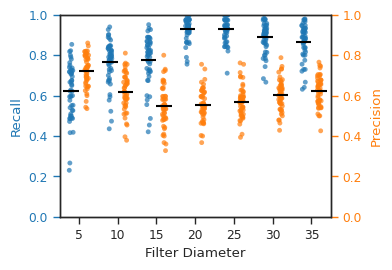

In [150]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


# Create a striplot of blur strength vs precision and recall
ax = sns.stripplot(data=d_melt, x='d', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7, size=3.5)
sns.boxplot(data=d_melt, x='d', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Filter Diameter")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/bilateral_filter_diameter.pdf', bbox_inches='tight')

plt.show()

In [72]:
# Repeat the steps above for the parameter 'd' for bilateral filtering
s10 = pd.read_csv("fig1/blur/bilateral_s10_2024-03-25_16-02.csv")
s10['s']=10
s30 = pd.read_csv("fig1/blur/bilateral_s30_2024-03-25_16-07.csv")
s30['s']=30
s50 = pd.read_csv("fig1/blur/bilateral_s50_2024-03-25_16-12.csv")
s50['s']=50
s70 = pd.read_csv("fig1/blur/bilateral_s70_2024-03-25_16-24.csv")
s70['s']=70
s90 = pd.read_csv("fig1/blur/bilateral_s90_2024-03-25_16-30.csv")
s90['s']=90
s110 = pd.read_csv("fig1/blur/bilateral_s110_2024-03-25_16-37.csv")
s110['s']=110
s130 = pd.read_csv("fig1/blur/bilateral_s130_2024-03-25_16-43.csv")
s130['s']=130


# Concatenate
s_master = pd.concat([s10, s30, s50, s70, s90, s110, s130])

# Use pivots/melts to make a plot
s_melt = s_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 's'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

s_melt

,model,iou,stability,uid,s,metric,value
0,vit_h,0.9,0.9,10052325399042271146,10,recall,0.465116
1,vit_h,0.9,0.9,1012761875947852486,10,recall,0.829268
2,vit_h,0.9,0.9,10164603400945916340,10,recall,0.700000
3,vit_h,0.9,0.9,1018451679478154278,10,recall,0.395833
4,vit_h,0.9,0.9,10214903082497276419,10,recall,0.511111
...,...,...,...,...,...,...,...
695,vit_h,0.9,0.9,13266244974299098930,130,precision,0.494118
696,vit_h,0.9,0.9,13482212850578731754,130,precision,0.458333
697,vit_h,0.9,0.9,13515062055012148070,130,precision,0.432432
698,vit_h,0.9,0.9,13531435791539149697,130,precision,0.588235


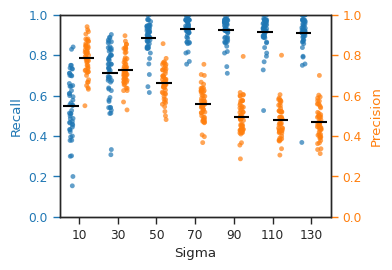

In [151]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


# Create a striplot of blur strength vs precision and recall
ax = sns.stripplot(data=s_melt, x='s', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7, size=3.5)
sns.boxplot(data=s_melt, x='s', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Sigma")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/bilateral_sigma.pdf', bbox_inches='tight')

plt.show()

In [76]:
# Figure 1d -- effect of roundness and roundness+area filters on precision and recall

# Import the roundness alone dataset
r50 = pd.read_csv("fig1/filters/roundness/roundness_50_2024-03-25_16-53.csv")
r50['r']=0.5
r60 = pd.read_csv("fig1/filters/roundness/roundness_60_2024-03-25_16-59.csv")
r60['r']=0.6
r70 = pd.read_csv("fig1/filters/roundness/roundness_70_2024-03-25_17-06.csv")
r70['r']=0.7
r80 = pd.read_csv("fig1/filters/roundness/roundness_80_2024-03-25_17-12.csv")
r80['r']=0.8
r90 = pd.read_csv("fig1/filters/roundness/roundness_90_2024-03-25_17-21.csv")
r90['r']=0.9

# Concatenate
r_master = pd.concat([r50, r60, r70, r80, r90])

# Use pivots/melts to make a plot
r_melt = r_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'r'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

r_melt

,model,iou,stability,uid,r,metric,value
0,vit_h,0.9,0.9,10052325399042271146,0.5,recall,0.860465
1,vit_h,0.9,0.9,1012761875947852486,0.5,recall,1.000000
2,vit_h,0.9,0.9,10164603400945916340,0.5,recall,0.975000
3,vit_h,0.9,0.9,1018451679478154278,0.5,recall,0.937500
4,vit_h,0.9,0.9,10214903082497276419,0.5,recall,0.911111
...,...,...,...,...,...,...,...
495,vit_h,0.9,0.9,13266244974299098930,0.9,precision,0.333333
496,vit_h,0.9,0.9,13482212850578731754,0.9,precision,0.400000
497,vit_h,0.9,0.9,13515062055012148070,0.9,precision,0.428571
498,vit_h,0.9,0.9,13531435791539149697,0.9,precision,0.600000


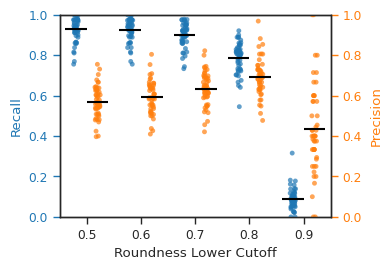

In [153]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


# Create a striplot of roundness cutoff vs precision and recall
ax = sns.stripplot(data=r_melt, x='r', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7, size=3.5)
sns.boxplot(data=r_melt, x='r', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Roundness Lower Cutoff")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/roundness.pdf', bbox_inches='tight')

plt.show()

In [79]:
# Figure 1d -- effect of roundness and roundness+area filters on precision and recall

# Import the roundness and area dataset
ra50 = pd.read_csv("fig1/filters/roundness_area/roundness_50_2024-03-25_17-28.csv")
ra50['r']=0.5
ra60 = pd.read_csv("fig1/filters/roundness_area/roundness_60_2024-03-25_17-37.csv")
ra60['r']=0.6
ra70 = pd.read_csv("fig1/filters/roundness_area/roundness_70_2024-03-25_17-43.csv")
ra70['r']=0.7
ra80 = pd.read_csv("fig1/filters/roundness_area/roundness_80_2024-03-25_17-50.csv")
ra80['r']=0.8
ra90 = pd.read_csv("fig1/filters/roundness_area/roundness_90_2024-03-25_18-36.csv")
ra90['r']=0.9

# Concatenate
ra_master = pd.concat([ra50, ra60, ra70, ra80, ra90])

# Use pivots/melts to make a plot
ra_melt = ra_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'r'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')

ra_melt

,model,iou,stability,uid,r,metric,value
0,vit_h,0.9,0.9,10052325399042271146,0.5,recall,0.860465
1,vit_h,0.9,0.9,1012761875947852486,0.5,recall,0.951220
2,vit_h,0.9,0.9,10164603400945916340,0.5,recall,0.950000
3,vit_h,0.9,0.9,1018451679478154278,0.5,recall,0.916667
4,vit_h,0.9,0.9,10214903082497276419,0.5,recall,0.911111
...,...,...,...,...,...,...,...
495,vit_h,0.9,0.9,13266244974299098930,0.9,precision,1.000000
496,vit_h,0.9,0.9,13482212850578731754,0.9,precision,1.000000
497,vit_h,0.9,0.9,13515062055012148070,0.9,precision,1.000000
498,vit_h,0.9,0.9,13531435791539149697,0.9,precision,1.000000


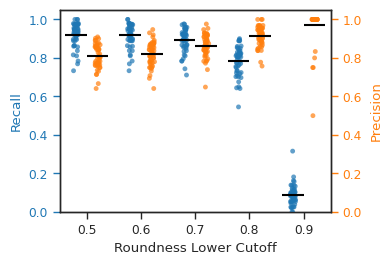

In [155]:
sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()

# Create a striplot of roundness+area cutoff vs precision and recall
ax = sns.stripplot(data=ra_melt, x='r', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7, size=3.5)
sns.boxplot(data=ra_melt, x='r', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Roundness Lower Cutoff")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1.05)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/roundness_area.pdf', bbox_inches='tight')

plt.show()

In [156]:
# Figure 1d -- comparison of vitl and vith on roundness=0.7 with area filter

# Import the roundness and area dataset
ral70 = pd.read_csv("fig1/filters/roundness_area_vitl/roundness_70_2024-03-26_11-38.csv")
ral70['r']=0.7

# Concatenate
ral_master = pd.concat([ra70, ral70])

# Use pivots/melts to make a plot
ral_melt = ral_master.melt(id_vars=['model', 'iou', 'stability', 'uid', 'r'],
                  value_vars=['recall', 'precision'],
                  var_name='metric',
                  value_name='value')



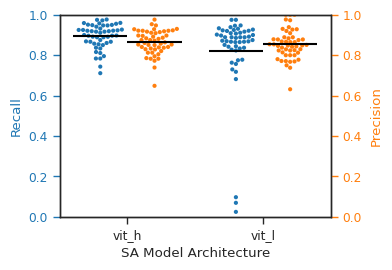

In [171]:
#ral_melt = ral_melt.loc[ral_melt['metric']=='recall']

sns.set_style("white")
sns.set_context("paper")
fig, ax = plt.subplots()


# Create a striplot of roundness cutoff vs precision and recall
ax = sns.swarmplot(data=ral_melt, x='model', y='value', hue='metric', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=1, size=3.0)
sns.boxplot(data=ral_melt, x='model', y='value', hue='metric', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("SA Model Architecture")
ax.set_ylabel("Recall", color='#1f77b4')
ax.xaxis.tick_bottom()
ax.set_ylim(0, 1.0)

# Color the left axis ticks blue
ax.tick_params(axis='y', colors='#1f77b4')

# Create a twin Axes sharing the xaxis
ax_right = ax.twinx()

# Set the label for the right y-axis with orange color, and adjust the position
ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# Color the right axis ticks orange
ax_right.tick_params(axis='y', colors='#ff7f0e')

# Ensure the ticks for the right y-axis are visible
ax_right.yaxis.tick_right()

# Synchronize the y-axis limits with the left y-axis
ax_right.set_ylim(ax.get_ylim())

# Hide the legend
ax.legend_.remove()

# Set the figure size with a width of 3.5 inches and a height calculated for 16:9 aspect ratio
width = 3.5
height = width / 4 * 3
fig.set_size_inches(width, height)

# Save the figure as a PDF
fig.savefig('fig1/model_type_optimized.svg', bbox_inches='tight')

plt.show()

Text(33.972222222222214, 0.5, 'Precision')

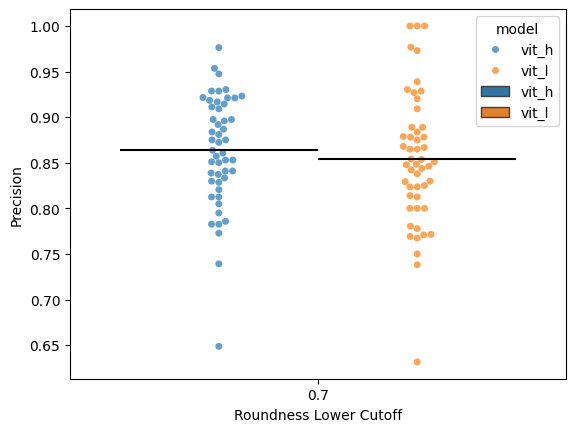

In [96]:
ral_melt = ral_melt.loc[ral_melt['metric']=='precision']

# Create a striplot of roundness cutoff vs precision and recall
ax = sns.swarmplot(data=ral_melt, x='r', y='value', hue='model', dodge=True, palette=['#1f77b4', '#ff7f0e'], alpha=0.7)
sns.boxplot(data=ral_melt, x='r', y='value', hue='model', ax=ax, 
            showmeans=True,
            meanline=True,
            meanprops={'color': 'black', 'ls': '-', 'lw': 1.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False,)

# Set x label and left y-axis label with blue color
plt.xlabel("Roundness Lower Cutoff")
ax.set_ylabel("Precision")#, color='#1f77b4')

# # Color the left axis ticks blue
# ax.tick_params(axis='y', colors='#1f77b4')

# # Create a twin Axes sharing the xaxis
# ax_right = ax.twinx()

# # Set the label for the right y-axis with orange color, and adjust the position
# ax_right.set_ylabel('Precision', color='#ff7f0e', rotation=90, va='bottom', labelpad=15)

# # Color the right axis ticks orange
# ax_right.tick_params(axis='y', colors='#ff7f0e')

# # Ensure the ticks for the right y-axis are visible
# ax_right.yaxis.tick_right()

# # Synchronize the y-axis limits with the left y-axis
# ax_right.set_ylim(ax.get_ylim())